<a href="https://colab.research.google.com/github/tstef87/IDS/blob/main/HW5/problem1R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
#read in data
library(readr)
companyDF <- read_csv("https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv", show_col_types = FALSE)


In [86]:
#displaying first 10 in dataframe 
head(companyDF, 10)

TV,Radio,Newspaper,Sales
<dbl>,<dbl>,<dbl>,<dbl>
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,12.0
151.5,41.3,58.5,16.5
180.8,10.8,58.4,17.9
8.7,48.9,75.0,7.2
57.5,32.8,23.5,11.8
120.2,19.6,11.6,13.2
8.6,2.1,1.0,4.8


In [87]:
#providing a summary of all vlaues in the data frame 
summary(companyDF)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

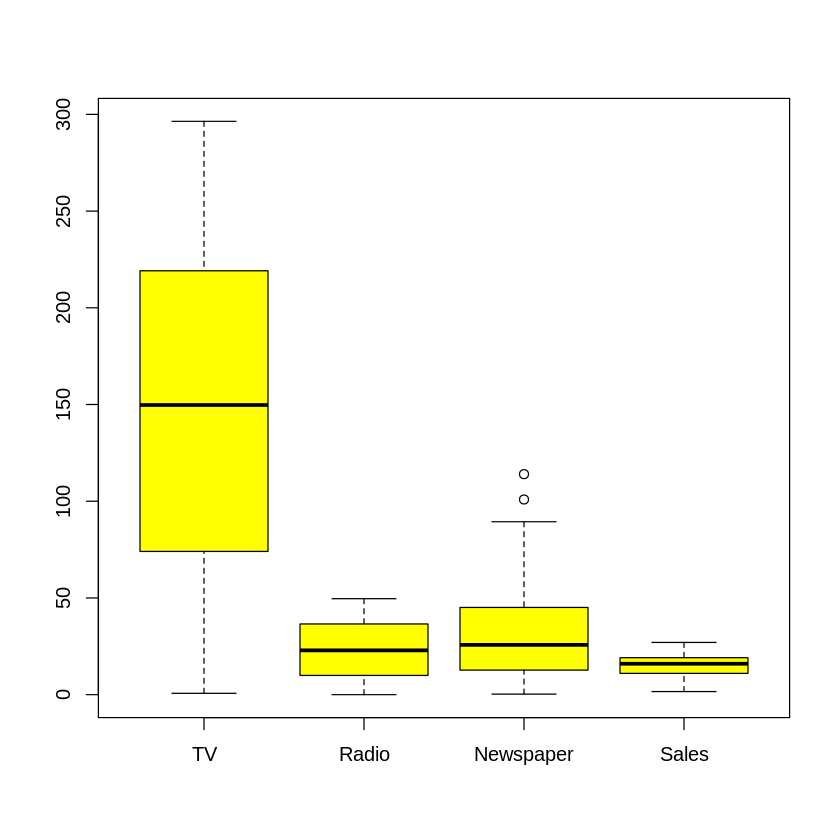

In [88]:
#ploting a box plot for data frame 
boxplot(companyDF, col = "yellow")

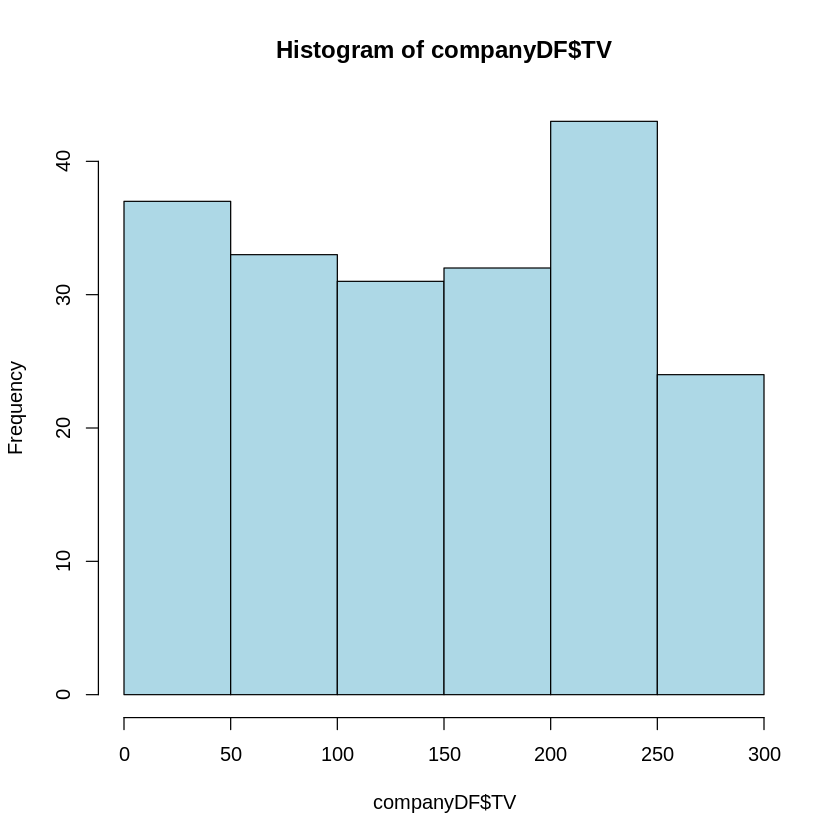

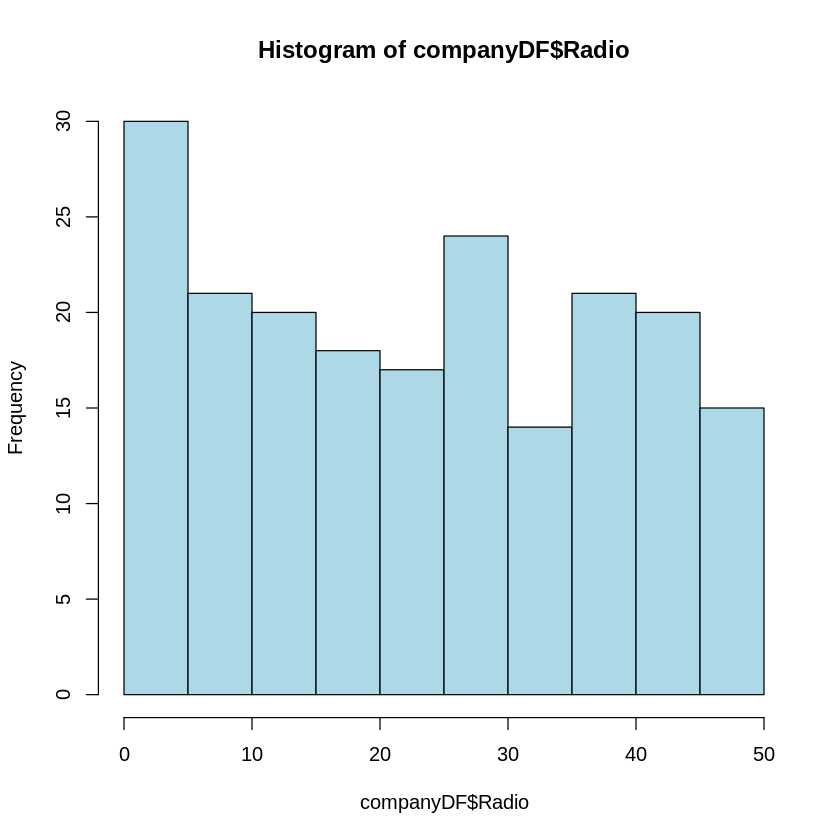

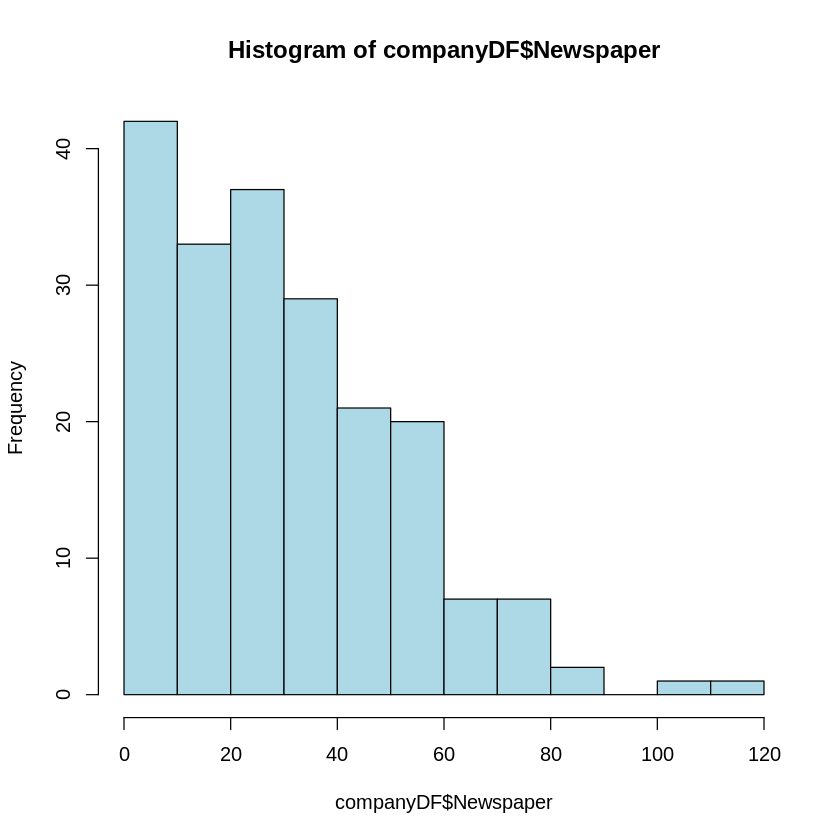

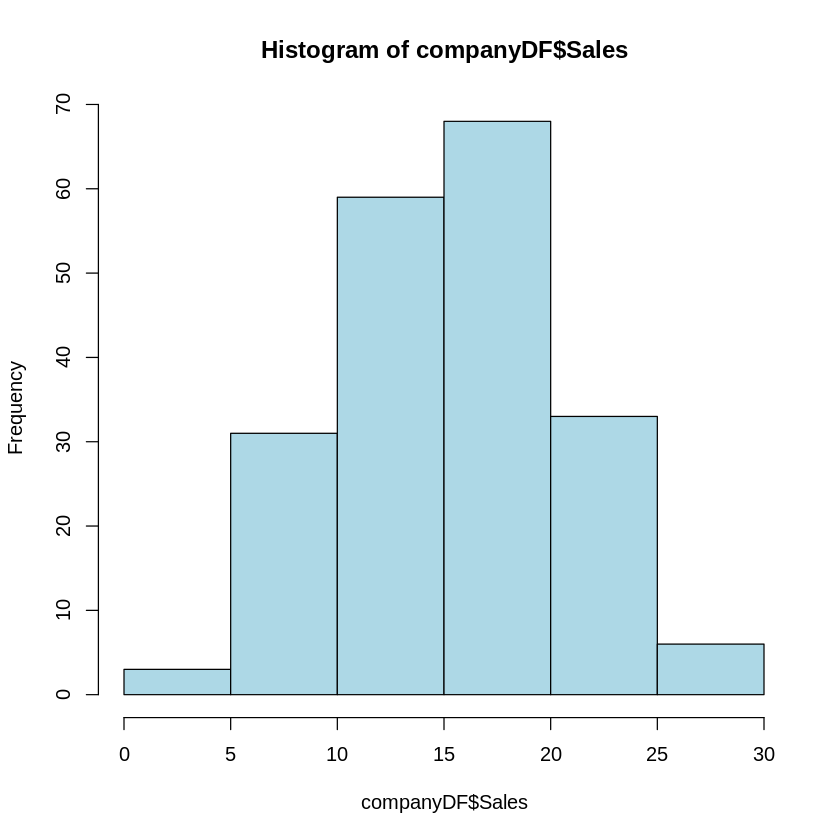

In [89]:
#importing ggplot 
library("ggplot2")

#making a histoogram for all values 
hist(companyDF$TV, col = "light blue")
hist(companyDF$Radio, col = "light blue")
hist(companyDF$Newspaper, col = "light blue")
hist(companyDF$Sales, col = "light blue")


In [90]:
#checking for missing values
cat("Missing values: \nTV- ", sum(is.na(companyDF$TV)),
"\nRadio- ", sum (is.na(companyDF$Radio)),
"\nNews Paper- ", sum (is.na(companyDF$Newspaper)),
"\nSales- ", sum (is.na(companyDF$Sales)))

Missing values: 
TV-  0 
Radio-  0 
News Paper-  0 
Sales-  0

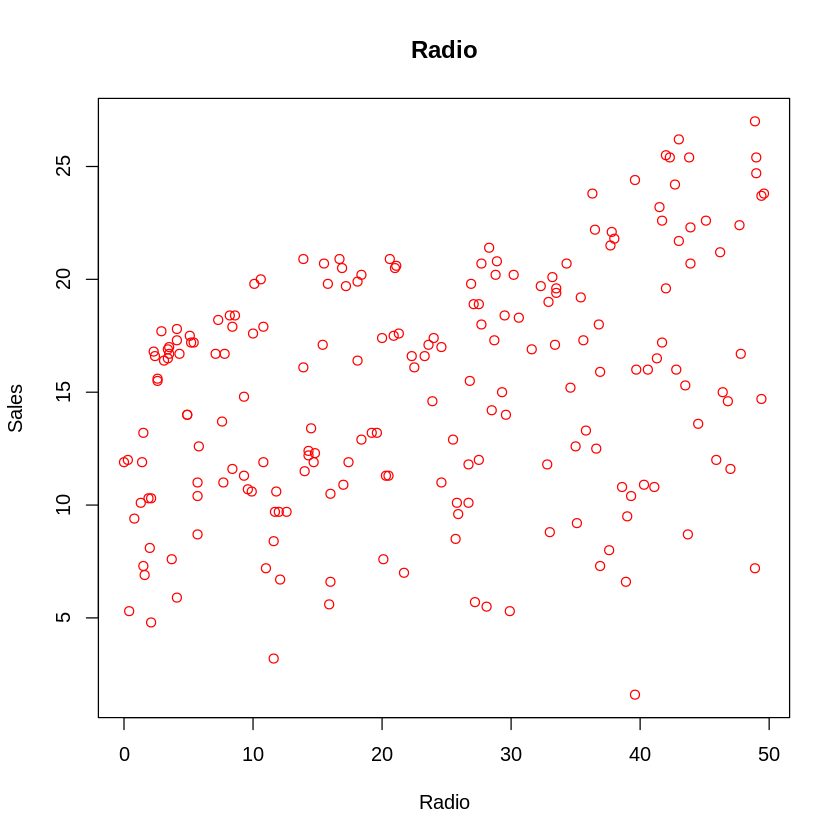

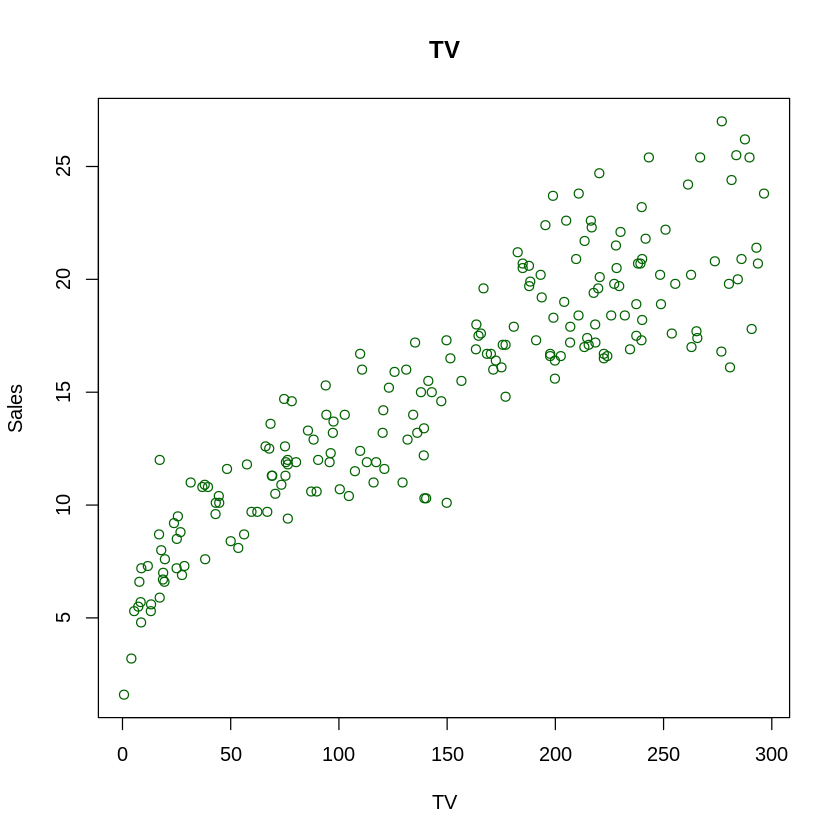

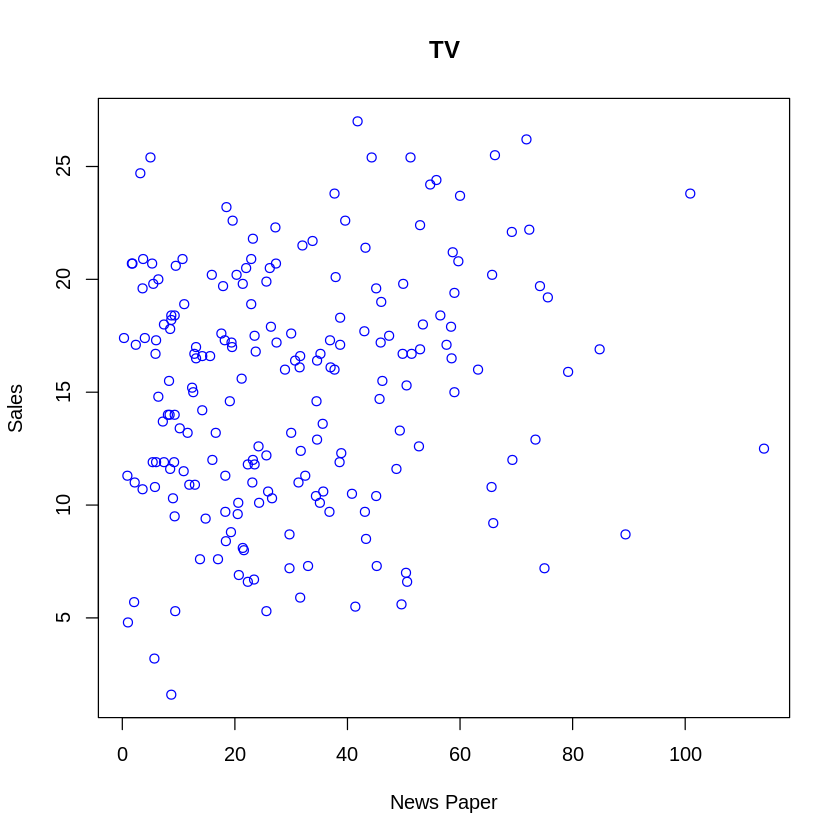

In [91]:
#creating skater plots for...
#radio vs sales 
plot(companyDF$Radio, companyDF$Sales, main="Radio",
   xlab="Radio", ylab="Sales", col = "Red")

#tv vs sales 
plot(companyDF$TV, companyDF$Sales, main="TV",
   xlab="TV", ylab="Sales", col = "Dark Green")

#news paper vs sales 
plot(companyDF$Newspaper, companyDF$Sales, main="TV",
   xlab="News Paper", ylab="Sales", col = "Blue")

***TV vs. Sales***

In [103]:
#creating linear model for full training set
x <- companyDF$TV
y <- companyDF$Sales 

lm1 <- lm(y~x)
summary(lm1)
#intercept(6.97482) slope(0.05546) R2 (0.8122)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4438 -1.4857  0.0218  1.5042  5.6932 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.974821   0.322553   21.62   <2e-16 ***
x           0.055465   0.001896   29.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.296 on 198 degrees of freedom
Multiple R-squared:  0.8122,	Adjusted R-squared:  0.8112 
F-statistic: 856.2 on 1 and 198 DF,  p-value: < 2.2e-16


In [98]:
#70, 30 train to test 
sample <- sample(c(TRUE, FALSE), nrow(companyDF), replace = T, prob = c(.7,.3))
train <- companyDF[sample, ]
test <- companyDF[!sample, ]


In [99]:
#training linear model (70 train 30 test)
lm2 <- lm(y ~ x, data = train)
summary(lm2)
#intercept(6.974821) Slopet(0.055465) R2(0.8122)


Call:
lm(formula = y ~ x, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4438 -1.4857  0.0218  1.5042  5.6932 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.974821   0.322553   21.62   <2e-16 ***
x           0.055465   0.001896   29.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.296 on 198 degrees of freedom
Multiple R-squared:  0.8122,	Adjusted R-squared:  0.8112 
F-statistic: 856.2 on 1 and 198 DF,  p-value: < 2.2e-16


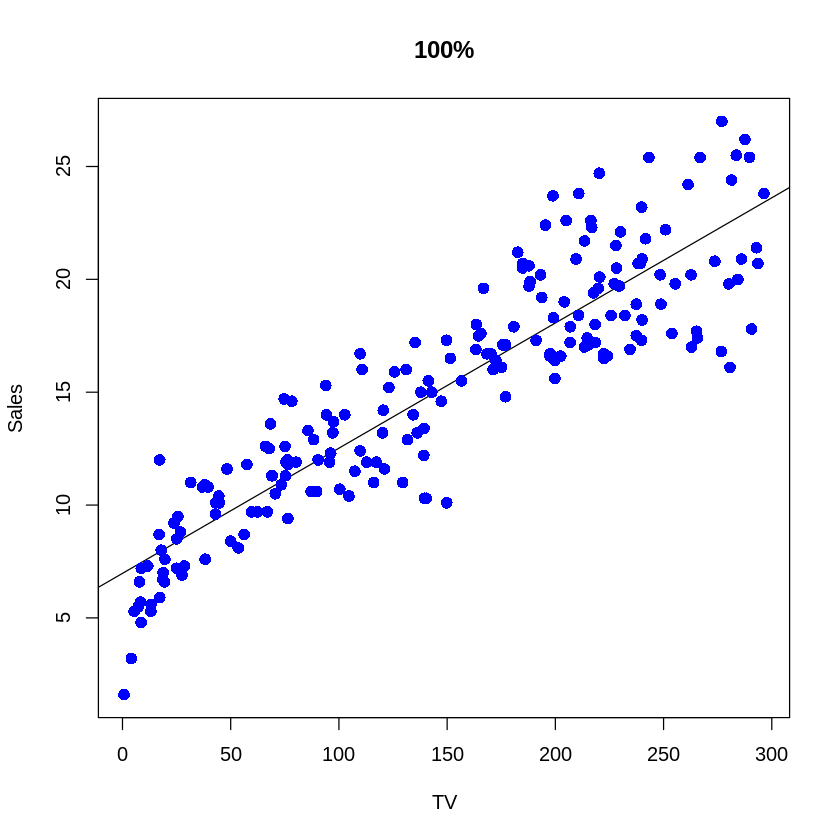

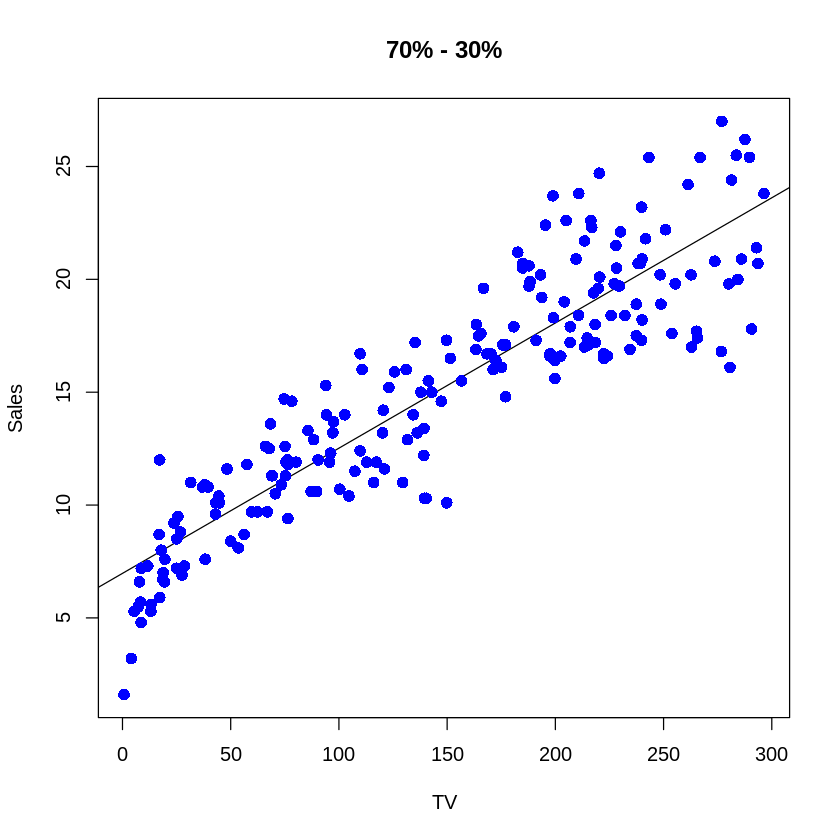

In [100]:
#polting both full trained and 70 30 trained charts 
plot(x,y,col = "blue",main = "100%",abline(lm1),cex = 1.3,pch = 16,xlab = "TV",ylab = "Sales")
plot(x,y,col = "blue",main = "70% - 30%",abline(lm2),cex = 1.3,pch = 16,xlab = "TV",ylab = "Sales")

***Radio Vs. Sales***

In [105]:
#creating linear model for full training set
r <- companyDF$Radio

lmR1 <- lm(y~r)
summary(lmR1)
#intercept(12.2357) slope(0.1244) R2 (0.1222)


Call:
lm(formula = y ~ r)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5632  -3.5293   0.6714   4.2504   8.6796 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  12.2357     0.6535  18.724  < 2e-16 ***
r             0.1244     0.0237   5.251 3.88e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.963 on 198 degrees of freedom
Multiple R-squared:  0.1222,	Adjusted R-squared:  0.1178 
F-statistic: 27.57 on 1 and 198 DF,  p-value: 3.883e-07


In [108]:
#training linear model (70 train 30 test)
lmR2 <- lm(y ~ r, data = train)
summary(lmR2)
#intercept(12.2357) Slopet(0.1244) R2(0.1222)


Call:
lm(formula = y ~ r, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5632  -3.5293   0.6714   4.2504   8.6796 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  12.2357     0.6535  18.724  < 2e-16 ***
r             0.1244     0.0237   5.251 3.88e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.963 on 198 degrees of freedom
Multiple R-squared:  0.1222,	Adjusted R-squared:  0.1178 
F-statistic: 27.57 on 1 and 198 DF,  p-value: 3.883e-07


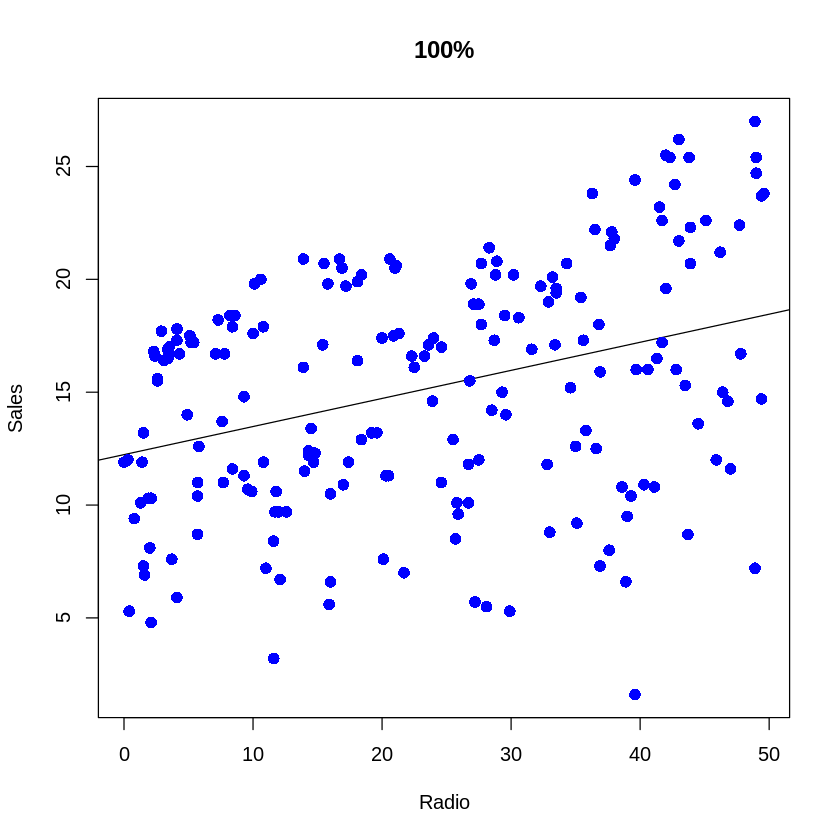

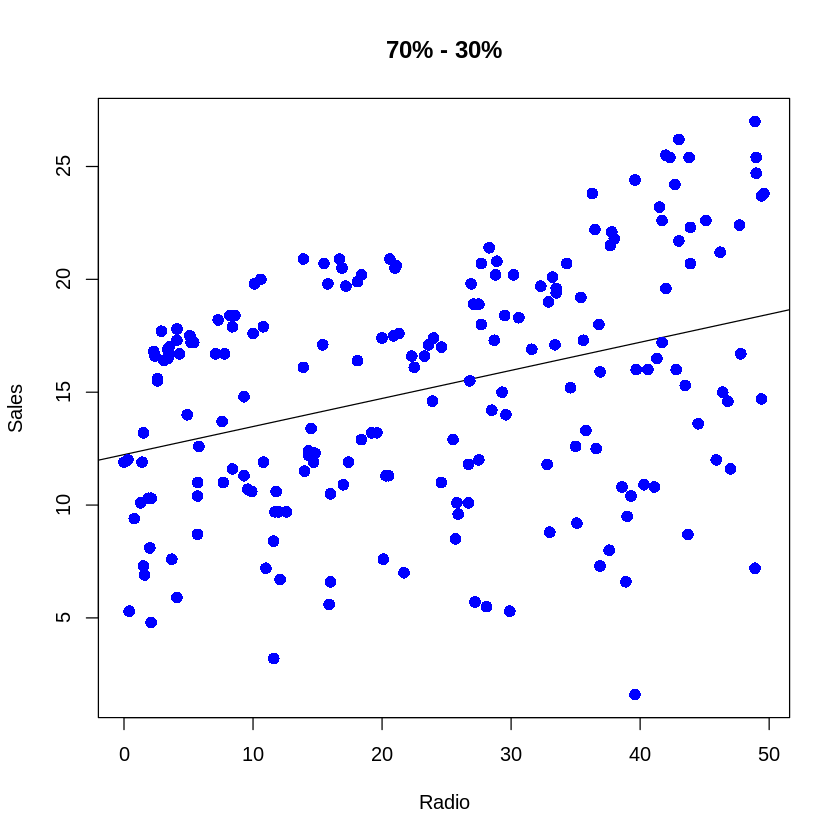

In [110]:
#polting both full trained and 70 30 trained charts 
plot(r,y,col = "blue",main = "100%",abline(lmR1),cex = 1.3,pch = 16,xlab = "Radio",ylab = "Sales")
plot(r,y,col = "blue",main = "70% - 30%",abline(lmR2),cex = 1.3,pch = 16,xlab = "Radio",ylab = "Sales")

***News Paper vs. Sales***

In [111]:
#creating linear model for full training set
n <- companyDF$Newspaper

lmN1 <- lm(y~n)
summary(lmN1)
#intercept(13.95955) slope(0.03832) R2 (0.02495)


Call:
lm(formula = y ~ n)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6930  -3.8807   0.6591   3.9083  11.4385 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.95955    0.63829  21.870   <2e-16 ***
n            0.03832    0.01703   2.251   0.0255 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.231 on 198 degrees of freedom
Multiple R-squared:  0.02495,	Adjusted R-squared:  0.02003 
F-statistic: 5.067 on 1 and 198 DF,  p-value: 0.02549


In [112]:
#training linear model (70 train 30 test)
lmN2 <- lm(y ~ n, data = train)
summary(lmN2)
#intercept(13.95955) Slopet(0.03832) R2(0.02495)


Call:
lm(formula = y ~ n, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6930  -3.8807   0.6591   3.9083  11.4385 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.95955    0.63829  21.870   <2e-16 ***
n            0.03832    0.01703   2.251   0.0255 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.231 on 198 degrees of freedom
Multiple R-squared:  0.02495,	Adjusted R-squared:  0.02003 
F-statistic: 5.067 on 1 and 198 DF,  p-value: 0.02549


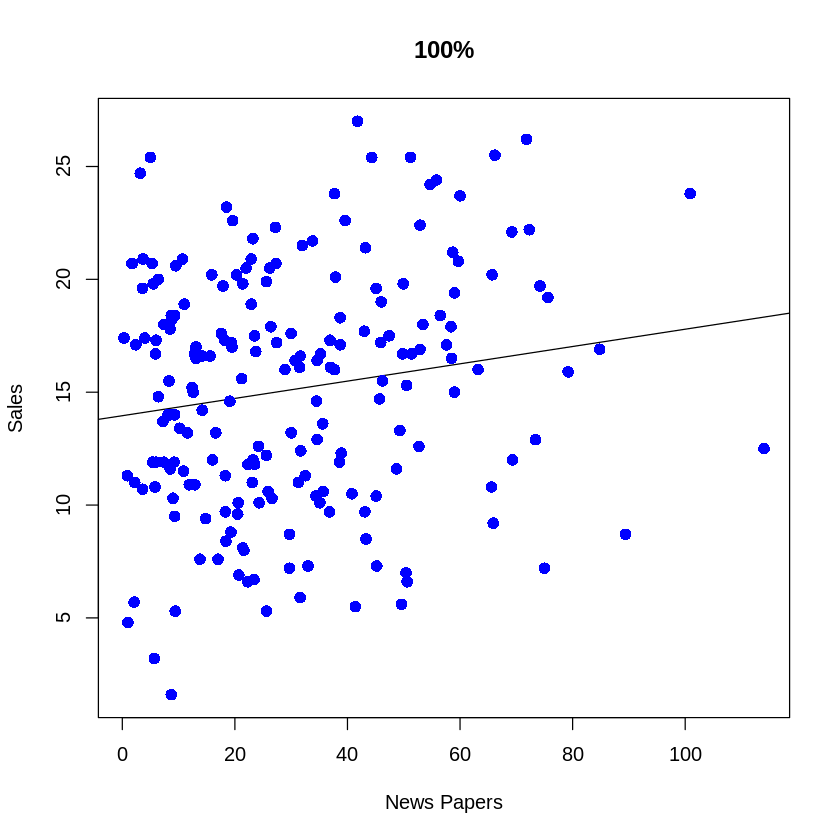

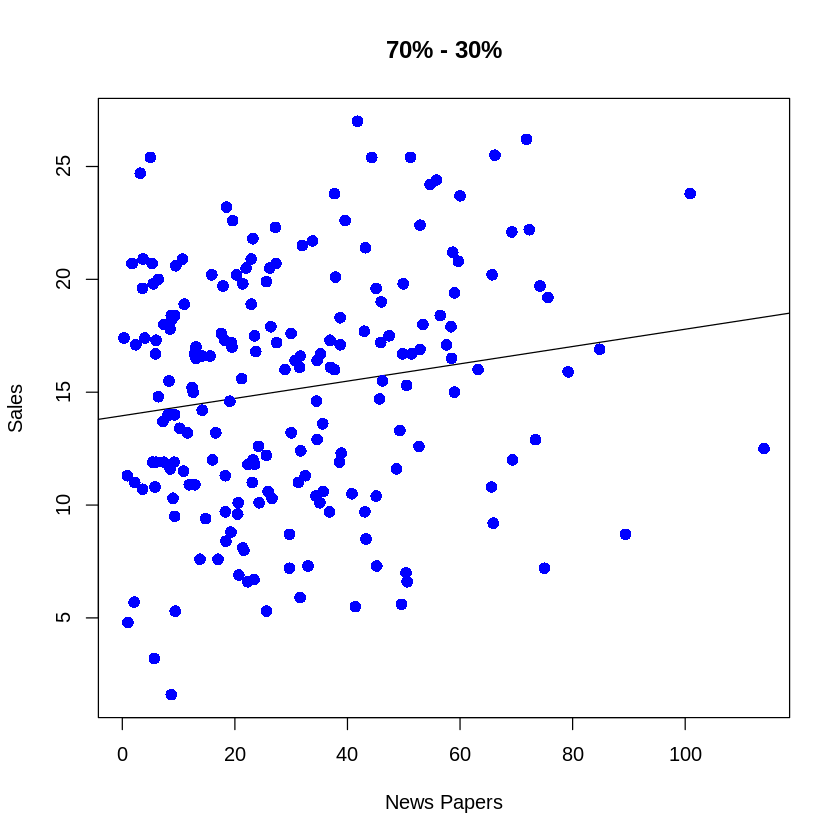

In [113]:
#polting both full trained and 70 30 trained charts 
plot(n,y,col = "blue",main = "100%",abline(lmN1),cex = 1.3,pch = 16,xlab = "News Papers",ylab = "Sales")
plot(n,y,col = "blue",main = "70% - 30%",abline(lmN2),cex = 1.3,pch = 16,xlab = "News Papers",ylab = "Sales")